In [2]:
from IPython.display import display, Math, Latex

# Evaluation Metrics for regresion-based predictive models 

Each predictive model is trying to solve a problem with a different objective using a different dataset and hence, it is important to understand the context before choosing a metric.

Usually, the answers to the following question help us choose the appropriate metric:

    * Type of task: Regression? Classification?
    * Business goal?
    * What is the distribution of the target variable?

## Regression Metrics

* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)
* R Squared (R²)
* Adjusted R Squared (R²)
* Mean Square Percentage Error (MSPE)
* Mean Absolute Percentage Error (MAPE)
* Root Mean Squared Logarithmic Error (RMSLE)

### Mean Squared Error (MSE)

It is perhaps the most simple and common metric for regression evaluation, but also probably the least useful. It is defined by the equation

$$
MSE = \frac{1}{n} \sum_{i=1}^N (y_1-\hat{y}_i)^2 
$$




where $y_ᵢ$ is the actual expected output and $\hat{y}_i$ is the model’s prediction.

MSE basically measures average squared error of our predictions. For each point, it calculates square difference between the predictions and the target and then average those values.

* The higher this value, the worse the model is
* It is never negative, since we’re squaring the individual prediction-wise errors before summing them, but would be zero for a perfect model .

* __Advantage__: Useful if we have unexpected values that we should care about. Vey high or low value that we should pay attention.

* __Disadvantage__: If we make a single very bad prediction, the squaring will make the error even worse and it may skew the metric towards overestimating the model’s badness. That is a particularly problematic behaviour if we have noisy data (that is, data that for whatever reason is not entirely reliable)

even a “perfect” model may have a high MSE in that situation, so it becomes hard to judge how well the model is performing.

On the other hand, if all the errors are small, or rather, smaller than 1, than the opposite effect is felt: we may underestimate the model’s badness.

Note that if we want to have a constant prediction the best one will be the mean value of the target values. It can be found by setting the derivative of our total error with respect to that constant to zero, and find it from this equation.


### Root Mean Squared Error (RMSE)

RMSE is just the square root of MSE. The square root is introduced to make scale of the errors to be the same as the scale of targets.

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^N (y_i-\hat{y}_i)^2 } = \sqrt{MSE}
$$

MSE and RMSE are similar in terms of their minimizers, every minimizer of MSE is also a minimizer for RMSE and vice versa since the square root is an non-decreasing function.

$$
MSE(a)>MSE(b)\Rightarrow RMSE(a)>RMSE(b)
$$

It means that, if the target metric is RMSE, we still can compare our models using MSE,since MSE will order the models in the same way as RMSE. Thus we can optimize MSE instead of RMSE.

MSE is a little bit easier to work with, so everybody uses MSE instead of RMSE. Also a little bit of difference between the two for gradient-based models.

$$
\frac{\partial RMSE}{\partial \hat{y}_i} = \frac{1}{2 \sqrt{MSE} }  \frac{\partial MSE}{\partial \hat{y}_i } 
$$

It means that travelling along MSE gradient is equivalent to traveling along RMSE gradient but with a different flowing rate and the flowing rate depends on MSE score itself.

So even though RMSE and MSE are really similar in terms of models scoring, they can be not immediately interchangeable for gradient based methods. We will probably need to adjust some parameters like the learning rate.




### Mean Absolute Error (MAE)

In MAE the error is calculated as an average of absolute differences between the target values and the predictions. The MAE is a linear score which means that all the individual differences are weighted equally in the average. For example, the difference between 10 and 0 will be twice the difference between 5 and 0. However, same is not true for RMSE. Mathematically, it is calculated using this formula:

$$
MAE = \frac{1}{n} \sum_{i=1}^N |y_i - \hat{y}_i|
$$

MAE penalizes huge errors larger in compararison with MSE. So, it’s not that sensitive to outliers as MSE.

MAE is widely used in finance, where 10 euros error is usually exactly two times worse than 5 error. On the other hand, MSE metric thinks that 10 euros error is four times worse than 5 euros error.

MAE is easier to justify than RMSE.

The gradient of the MAE metric it is not defined as the gradiend is a step function and it takes -1 when $\hat{y}$ is smaller than the target and +1 when it is larger. So formally, MAE is not differentiable, second derivative is zero everywhere and not defined in the point zero.

### R Squared ($R^2$)
The coefficient of determination, or $R^2$, is another metric we may use to evaluate a model and it is closely related to MSE, but has the advantage of being scale-free — it does not matter if the output values are very large or very small, the $R^2$ is always going to be between $(-\infty, 1)$

It is hard to realize if our model is good or not by looking at the absolute values of MSE or RMSE. We would probably want to measure how much our model is better than the constant baseline.That is what makes $R^2$.
Example:
* MSE(a) = 32
* RMSE(a) = 4
* $R^2$(a) = 0.85

___When R² is negative it means that the model is worse than predicting the mean.___

$$
R^2 = 1  - \frac{MSE(model)}{MSE(baseline)} = \frac{\sigma_{y,\hat{y}}}{\sigma_{y} \sigma_{\hat{y}}}
$$

The MSE of the model is computed as above, while the MSE of the baseline is defined as:

$$
MSE(baseline) = \frac{1}{n} \sum_{i=1}^N (y_i-\bar{y})^2 
$$

where the $\bar{y}$ is the mean of the observed $y_i$

baseline MSE can be thought of as the MSE that the simplest possible model would get. The simplest possible model would be to always predict the average of all samples. A value close to 1 indicates a model with close to zero error, and a value close to zero indicates a model very close to the baseline.

___In conclusion, R² is the ratio between how good our model is vs how good is the naive mean model.___


## Remarks
* MAE is more robust (less sensitive to outliers) than MSE 
* $R^2$ is good to know about the performance of a model in general

## Example

MSE: 2548.07
RMSE: 50.48
MAE: 41.23
R2: 0.47


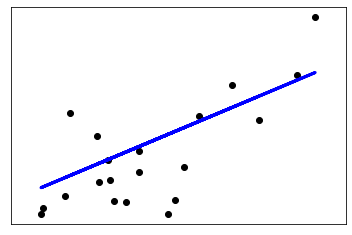

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print("MSE: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The Root mean squared error
print("RMSE: %.2f"
      % np.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred)))
# The MAE
print("MAE: %.2f"
      % mean_absolute_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('R2: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()